In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('train_agriculture.xlsx')
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
data.shape

(4599, 10)

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64


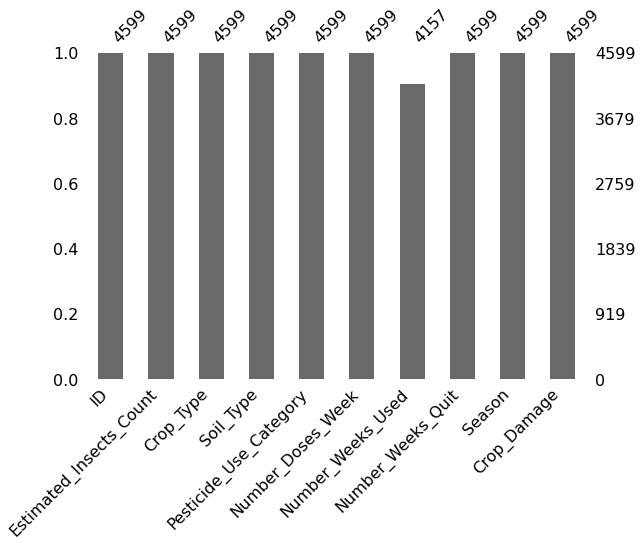

In [4]:
import missingno as msno
print(data.isnull().sum())

p = msno.bar(data, figsize = (9,6))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [6]:
data['Number_Weeks_Used'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
4594     NaN
4595    47.0
4596     7.0
4597    20.0
4598    33.0
Name: Number_Weeks_Used, Length: 4599, dtype: float64>

In [7]:
data['Number_Weeks_Used']=data['Number_Weeks_Used'].fillna(data['Number_Weeks_Used'].mode()[0])

In [8]:
data.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [9]:
pd.DataFrame(data.groupby(['Crop_Damage','Crop_Type'])['Pesticide_Use_Category'].count())

Pesticide_Use_Category
Crop_Damage Crop_Type                        
0           0                            2979
            1                             841
1           0                             498
            1                             166
2           0                              88
            1                              27

In [10]:
pd.DataFrame(data.groupby(['Crop_Damage','Season','Crop_Type'])['Estimated_Insects_Count'].count())

Estimated_Insects_Count
Crop_Damage Season Crop_Type                         
0           1      0                              910
                   1                              240
            2      0                             1471
                   1                              437
            3      0                              598
                   1                              164
1           1      0                              136
                   1                               56
            2      0                              274
                   1                               84
            3      0                               88
                   1                               26
2           1      0                               27
                   1                               10
            2      0                               50
                   1                               11
            3      0                               11
                   1                                6

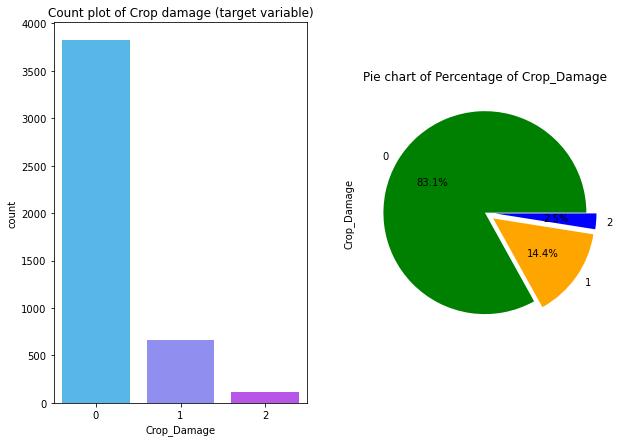

In [11]:
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Damage' , palette= 'cool', data= data) 
plt.title("Count plot of Crop damage (target variable)")

plt.subplot(1,2,2)
count = data['Crop_Damage'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'], figsize = (10,7),explode = [0,0.1,0.1],title = "Pie chart of Percentage of Crop_Damage")

Note that the number of observations belonging to the '0' category is way greater than that belonging to '1'and '2' category. Hence we have skewed classes and this is a typical example of the 'Imbalanced Classification Problem'.

How to handled imbalanced dataset is full detailed in my medium blog - https://vivekrai1011.medium.com/undersampling-and-oversampling-imbalanced-data-bf7e9405fcad

And my GitHub link - https://github.com/VivekRai10/Handle-Imbalanced-Dataset-master.git

Text(0.5, 1.0, 'Plot of crop damage Vs Crop type')

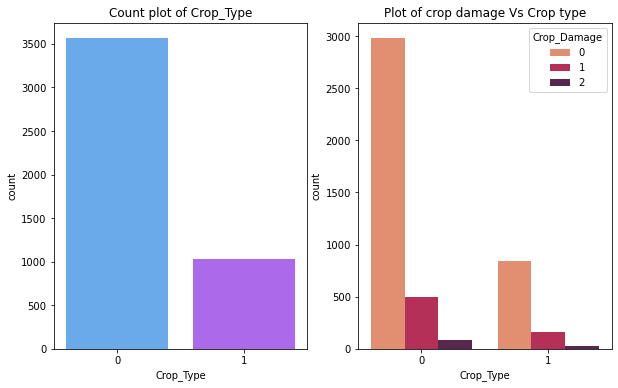

In [12]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Type' , palette= 'cool', data= data) 
plt.title("Count plot of Crop_Type")

plt.subplot(1,2,2)
sns.countplot(data['Crop_Type'], hue = data['Crop_Damage'],palette="rocket_r")
plt.title("Plot of crop damage Vs Crop type")

Clearly see that Crop_Type '0' is large and obviously a crop damage in this category is also large

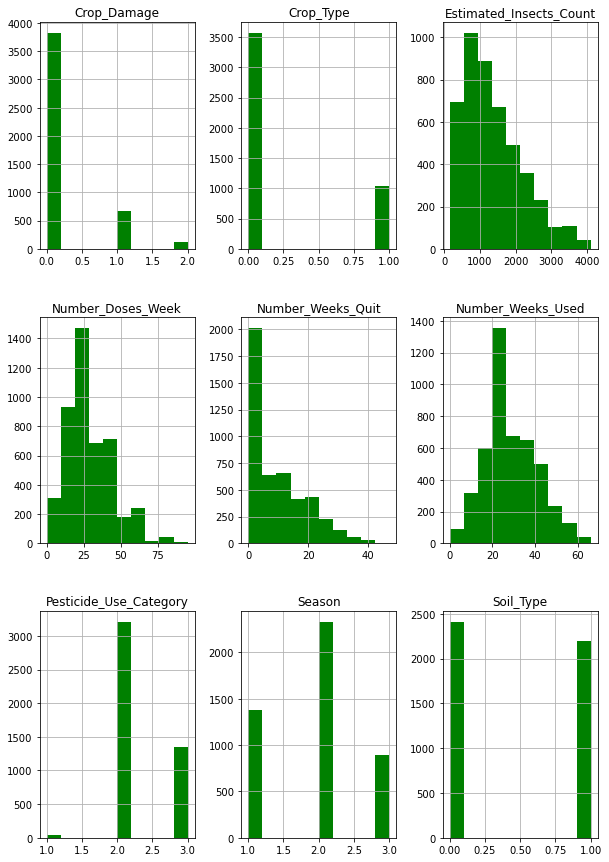

In [13]:
data.hist(figsize=(10,15),color = 'green')
plt.show()

Text(0.5, 1.0, 'Density plot of Estimated_Insects_Count')

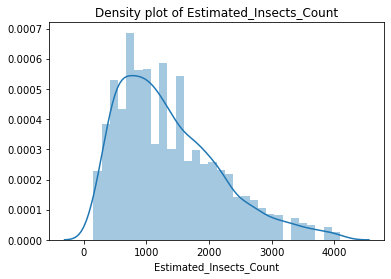

In [14]:
sns.distplot(data['Estimated_Insects_Count'], kde = True, hist = True, bins= 30)
plt.title("Density plot of Estimated_Insects_Count")

it is slightly normal distributed it is positive skewed 

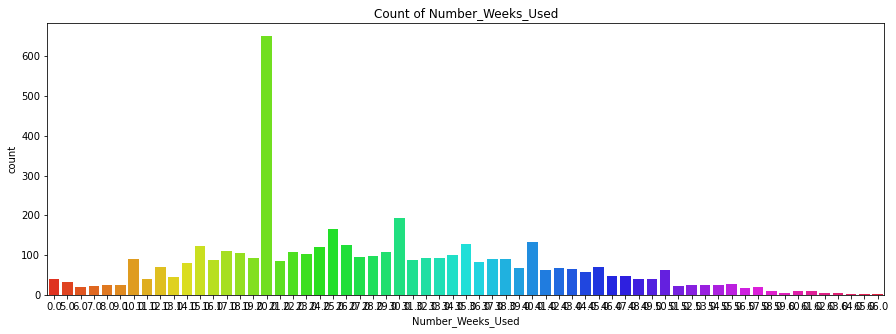

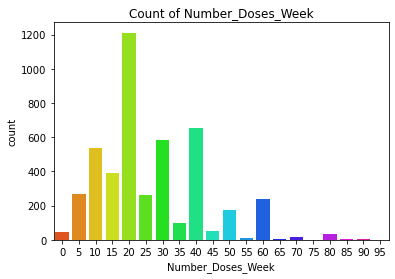

In [15]:
plt.figure(figsize = (15,5))
sns.countplot(data['Number_Weeks_Used'], palette = 'hsv')
plt.title('Count of Number_Weeks_Used')
plt.show() 
sns.countplot(data['Number_Doses_Week'], palette = 'hsv')
plt.title('Count of Number_Doses_Week')
plt.show() 


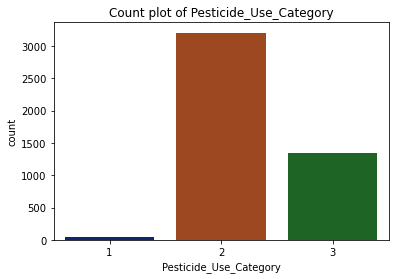

Text(0.5, 1.0, 'Box plot of Pesticide_Use_Category')

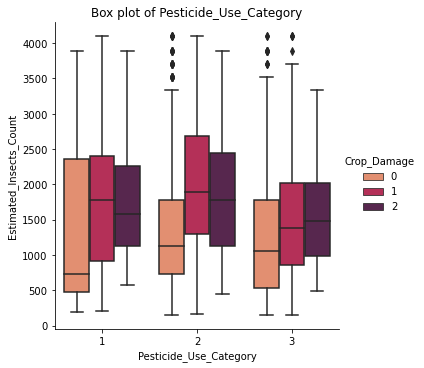

In [16]:
sns.countplot(data['Pesticide_Use_Category'], palette = 'dark')
plt.title("Count plot of Pesticide_Use_Category")
plt.show()
sns.catplot(x = 'Pesticide_Use_Category', y = 'Estimated_Insects_Count', kind = 'box', data = data, hue = 'Crop_Damage', palette= 'rocket_r')
plt.title("Box plot of Pesticide_Use_Category")

Pesticide category '2' is way greater than that belonging to '1'and '3' category 

and a crop damage category 1 is large if we use Pesticide use Category of Insects Count

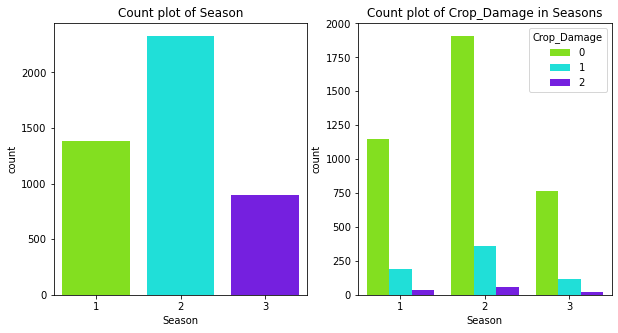

In [17]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data['Season'], palette = 'hsv')
plt.title('Count plot of Season')
plt.subplot(1,2,2)
sns.countplot(data['Season'], hue = data['Crop_Damage'], palette = 'hsv')
plt.title('Count plot of Crop_Damage in Seasons')
plt.show() 

Clearly see that in season '2' is large and obviously a crop damage in this season is also large

Text(0.5, 1.0, 'Count plot of Crop_type in Seasons')

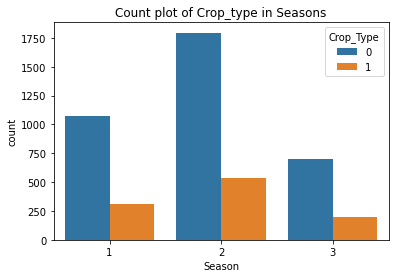

In [18]:
sns.countplot(data['Season'], hue = data['Crop_Type'])
plt.title('Count plot of Crop_type in Seasons')

In [19]:
data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [20]:
data.drop('ID',axis=1,inplace=True)

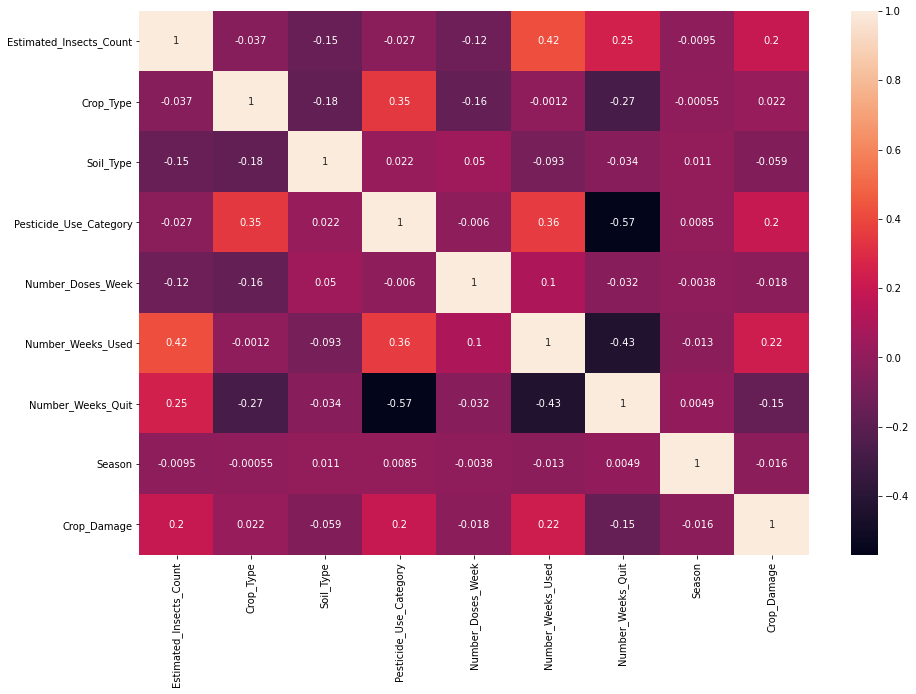

In [21]:
plt.figure(figsize=(15,10))
p=sns.heatmap(data.corr(), annot=True) 

We draw this correlation result on the bar plot to get better understanding

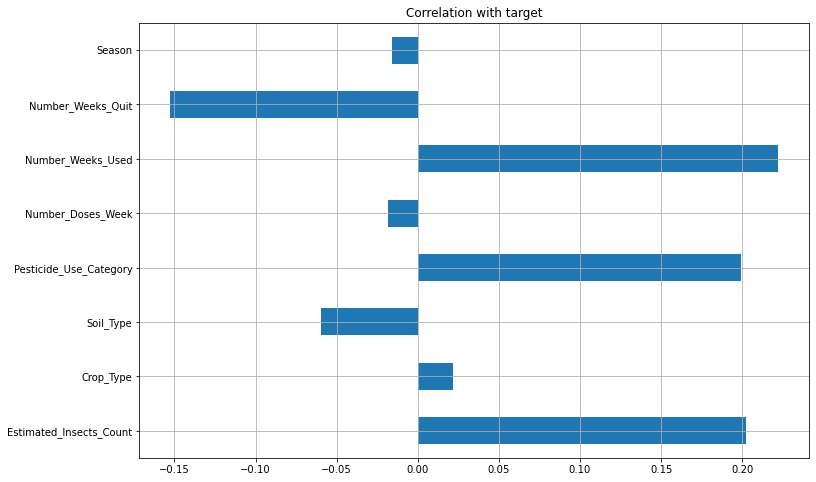

In [22]:
data.drop('Crop_Damage', axis=1).corrwith(data.Crop_Damage).plot(kind='barh', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

Here we clearly see Number_Weeks_Used,Pesticide_Use_Category Estimated_Insects_Count are very important features they are positively correlated with target

Number_Weeks_Quit and Soil_Type are negatively correlated with the target

Remaining features are not very important because it not correlated with our target variable

# Skewness

In [23]:
data.skew(axis=0)

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.432681
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [24]:
data['Estimated_Insects_Count']=np.log1p(data['Estimated_Insects_Count'])
data['Crop_Type']=np.log1p(data['Crop_Type'])
data['Pesticide_Use_Category']=np.log1p(data['Pesticide_Use_Category'])
data['Number_Doses_Week']=np.log1p(data['Number_Doses_Week'])
data['Number_Weeks_Quit']=np.log1p(data['Number_Weeks_Quit'])

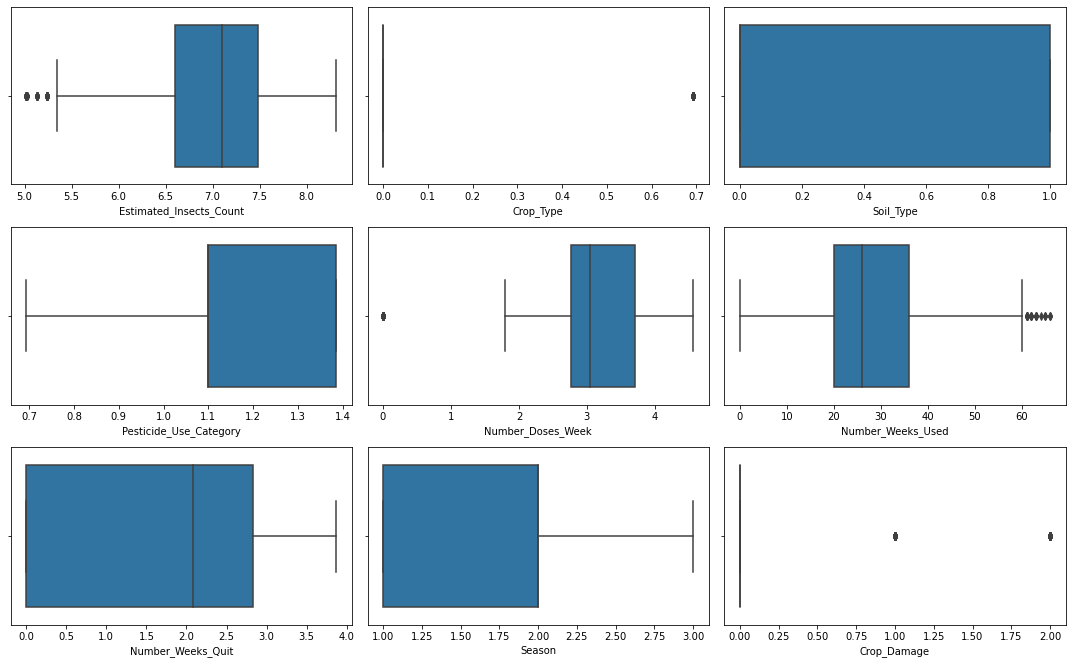

In [25]:
fig = plt.figure(figsize=(15,15))
for i in range(len(data.columns)):
    fig.add_subplot(5,3,i+1)
    sns.boxplot(data.iloc[:,i])

plt.tight_layout()
plt.show()

very less number of outliers is present in this dataset and small number of outliers we remove by Z - score

My medium blog about outliers treatment - https://vivekrai1011.medium.com/all-about-outlier-detction-techniques-4e7a803bd6

In [26]:
X = data.drop('Crop_Damage', axis=1)
y = data['Crop_Damage']

In [27]:
from collections import Counter
num_class1, num_class2, num_class3 = Counter(y)[0], Counter(y)[1], Counter(y)[2]

print(num_class1)
print(num_class2)
print(num_class3)

3820
664
115


In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy={0: int(2*num_class1), 1: int(7*num_class2), 2: int(15*num_class3)})

In [29]:
X_sm, y_sm = sm.fit_resample(X,y)

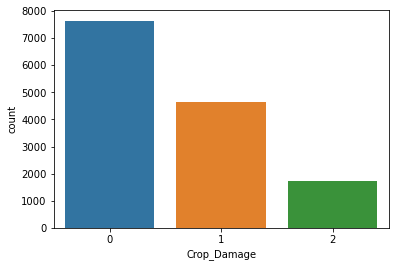

In [30]:
sns.countplot(y_sm)

Now the picture is better we create some information towards crop damage 1 and 2 type to avoid our model to biased towards only crop damage 0 type

In [31]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Original dataset shape Counter({0: 3820, 1: 664, 2: 115})
Resampled dataset shape Counter({0: 7640, 1: 4648, 2: 1725})


In [32]:
# Remove Outliers
from scipy.stats import zscore
z_score=abs(zscore(X))
print("The shape of dataset before removing outliers",X.shape)
X=X.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",X.shape)

The shape of dataset before removing outliers (4599, 8)
The shape of dataset after removing outliers (4524, 8)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size = 0.3, random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [36]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_ac= round(accuracy_score(y_test, lr_pred)* 100, 2)

#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_ac = round(accuracy_score(y_test, svc_pred)* 100, 2)

#Bayes
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_ac = round(accuracy_score(bayes_pred,y_test)* 100, 2)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_ac= round(accuracy_score(rdf_pred,y_test)* 100, 2)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_ac= round(accuracy_score(dtree_pred,y_test)* 100, 2)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_ac= round(accuracy_score(knn_pred,y_test)* 100, 2)

In [37]:
print('LogisticRegression_accuracy:',lr_ac)
print('RandomForest_accuracy:',rdf_ac)
print('DecisionTree_accuracy:',dtree_ac)
print('KNN_accuracy:',knn_ac)
print('SVM_classifier_accuracy:',sv_ac)
print('Bayes_accuracy:',bayes_ac)

LogisticRegression_accuracy: 60.92
RandomForest_accuracy: 84.25
DecisionTree_accuracy: 80.14
KNN_accuracy: 81.3
SVM_classifier_accuracy: 61.25
Bayes_accuracy: 60.16


Text(0.5, 1.0, 'Model Accracy')

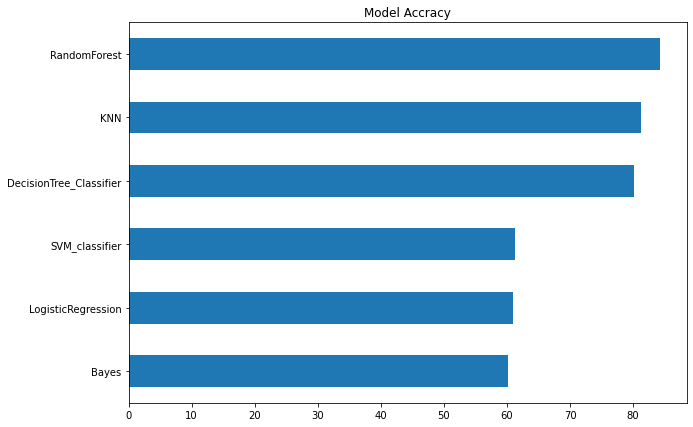

In [38]:
model_accuracy = pd.Series(data=[lr_ac,rdf_ac,dtree_ac,knn_ac,sv_ac,bayes_ac], 
                index=['LogisticRegression','RandomForest','DecisionTree_Classifier','KNN','SVM_classifier','Bayes'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

Random Forest is the best model to compare others model

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# n_estimators = [5, 10, 15,20,25,50,100]
# criterion = ['gini','entropy']
# max_features = ['auto','sqrt','log2']
# random_state = [5]

# RF = RandomForestClassifier()

# parameters = {'n_estimators': [5, 10, 15,20,25,50,100],'criterion': ['gini','entropy'],'max_features':['auto','sqrt','log2']}

# RFClassifier = GridSearchCV(RF, parameters, scoring='neg_mean_squared_error' ,cv =10)
# RFClassifier.fit(X_train,y_train)
# RFClassifier.best_params_

In [41]:
# {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

We put all this code in a comments because we get our best parameters and every time we run our model it takes lots of time to execute so we first find best parametrs to run first time and put comments symbol to avoid to run next time

In [42]:
RF = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 100)

RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)             

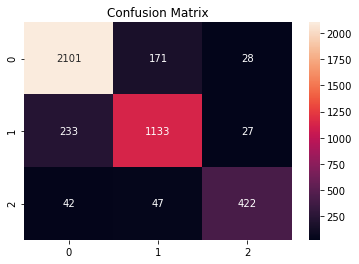

In [43]:
from sklearn.metrics import confusion_matrix
rdf_cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(rdf_cm,annot=True, ax = ax, annot_kws={"size": 10},fmt=".0f")
ax.set_title('Confusion Matrix'); 
plt.grid(False)

In [44]:
# Classiﬁcation Report
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2300
           1       0.84      0.81      0.83      1393
           2       0.88      0.83      0.85       511

    accuracy                           0.87      4204
   macro avg       0.87      0.85      0.86      4204
weighted avg       0.87      0.87      0.87      4204



In [45]:
import joblib
joblib.dump(RF, 'Crop_damage_pkl')

['Crop_damage_pkl']